In [1]:
# general: pandas y graficar:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# para estandarizar:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [3]:
# para modelos Unsupervised Machine Learning:

from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [4]:
# para evaluar los modelos:

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [5]:
# para guardar datos estandarizados y el modelo elegido:

import pickle

In [6]:
# Llamar al df con selección de canciones de Spotify: 

In [7]:
url = "/Users/karollvivianalopezvillegas/GitHub/DA_FT_Extra_Week10/Week_10/Mini-project_Spotify/My_Spotify_selection_FINAL.csv" 

In [8]:
df = pd.read_csv(url)

In [9]:
df.shape

(5447, 18)

In [10]:
df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.559,0.345,4,-13.496,1,0.0459,0.0576,0.000105,0.141,0.458,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4


In [11]:
df.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [12]:
df.duplicated().sum() #375 duplicates

0

In [13]:
df.shape  # 4,524 canciones

(5447, 18)

## Filtering the Dataframe with selected attributes to use in the UMLM:

In [14]:
X = df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','time_signature']]

In [15]:
X.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.559,0.345,4,-13.496,1,0.0459,0.0576,0.000105,0.141,0.458,84.581,4


In [16]:
minmax = MinMaxScaler()

X_scaled = minmax.fit_transform(X)

In [17]:
print(type(X_scaled))

<class 'numpy.ndarray'>


In [18]:
X_scaled.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Scaler as a pickle file:

In [19]:
# Save the scaler as a pickle file:
with open('minmax.pkl', 'wb') as file:
    pickle.dump(minmax, file)

## X_scaled as a DataFrame:

In [20]:
column_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']  

X_scaled_df = pd.DataFrame(X_scaled, columns=column_names)

In [21]:
X_scaled_df.head(1)

#[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       #'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       # 'duration_ms', 'time_signature']]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0.517652,0.33163,0.363636,0.530384,1.0,0.046388,0.057946,0.000107,0.128757,0.445545,0.201879,0.75


In [22]:
X_scaled_df.shape

(5447, 12)

## Elbow method:

In [23]:
inertia = []

for k in range(2,101):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

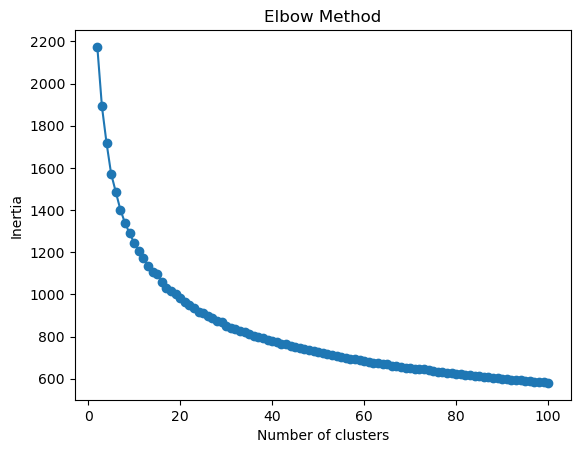

In [24]:
plt.plot(range(2,101), inertia, marker = "o")
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette method:

In [25]:
silhouette = []

for k in range(2,60):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X_scaled)
    labels = kmeans.predict(X_scaled)
    silhouette.append(silhouette_score(X_scaled, labels))

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

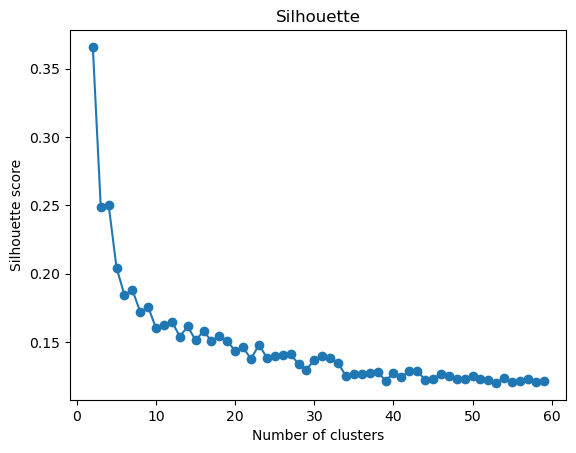

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(2,60), silhouette, marker = "o")
plt.title('Silhouette')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

## X_scaled_df, training the Unsupervised ML Model, KMeans:

In [27]:
kmeans_20 = KMeans(n_clusters = 20, random_state=42)

In [28]:
kmeans_20.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20, random_state=42)

In [29]:
kmeans_20.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([ 9, 14,  3, ...,  8, 12,  8], dtype=int32)

In [30]:
kmeans_30 = KMeans(n_clusters = 30, random_state=42)

In [31]:
kmeans_30.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=30, random_state=42)

In [32]:
kmeans_30.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([20, 17,  8, ..., 12, 14, 12], dtype=int32)

In [33]:
kmeans_25 = KMeans(n_clusters = 25, random_state=42)

In [34]:
kmeans_25.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=25, random_state=42)

In [35]:
kmeans_25.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([ 5, 20, 14, ..., 15,  0,  7], dtype=int32)

In [36]:
kmeans_15 = KMeans(n_clusters = 15, random_state=42)

In [37]:
kmeans_15.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=15, random_state=42)

In [38]:
kmeans_15.predict(X_scaled_df)

array([ 8, 14,  2, ..., 14, 12, 14], dtype=int32)

In [39]:
kmeans_13 = KMeans(n_clusters = 13, random_state=42)

In [40]:
kmeans_13.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=42)

In [41]:
kmeans_13.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([ 8,  2, 11, ...,  2,  6,  7], dtype=int32)

In [42]:
kmeans_12 = KMeans(n_clusters = 12, random_state=42)

In [43]:
kmeans_12.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=12, random_state=42)

In [44]:
kmeans_12.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([7, 2, 1, ..., 2, 8, 2], dtype=int32)

In [45]:
kmeans_11 = KMeans(n_clusters = 11, random_state=42)

In [46]:
kmeans_11.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=11, random_state=42)

In [47]:
kmeans_11.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0, 2, 3, ..., 2, 4, 2], dtype=int32)

## Adicionar número de clusters al dataframe original (df),
para obtener luego el id de una muestra del clúster

In [80]:
df["cluster"] = kmeans_20.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [81]:
df.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.559,0.345,4,-13.496,1,0.0459,0.0576,0.000105,0.141,0.458,84.581,audio_features,3d9DChrdc6BOeFsbrZ3Is0,spotify:track:3d9DChrdc6BOeFsbrZ3Is0,https://api.spotify.com/v1/tracks/3d9DChrdc6BO...,https://api.spotify.com/v1/audio-analysis/3d9D...,264307,4,9


In [82]:
# df.to_csv("/Users/karollvivianalopezvillegas/GitHub/DA_FT_Extra_Week10/Week_10/Mini-project_Spotify/My_Spotify_selection_WITH CLUSTERS_20.csv", index = False)

In [51]:
kmeans_10 = KMeans(n_clusters = 10, random_state=42)

In [52]:
kmeans_10.fit(X_scaled_df)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

In [53]:
kmeans_10.predict(X_scaled)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([7, 8, 2, ..., 8, 6, 8], dtype=int32)

## Silhouette score

In [54]:
#k = 20

labels = kmeans_20.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14355645882196186


In [55]:
labels_30 = kmeans_30.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.14355645882196186


In [56]:
labels_25 = kmeans_25.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_25)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.13625937350438588


In [57]:
labels_15 = kmeans_15.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_15)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15641735228485673


In [58]:
labels_13 = kmeans_13.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_13)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15847610403874837


In [59]:
labels_12 = kmeans_12.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_12)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.1571011371002346


In [60]:
labels_11 = kmeans_11.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_11)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15830482723097702


In [61]:
labels_10 = kmeans_10.fit_predict(X_scaled_df)

# Compute the Silhouette Score
sil_score = silhouette_score(X_scaled_df, labels_10)
print(f"Silhouette Score: {sil_score}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.15471227908420404


## Calinski-Harabasz Index

In [62]:
# k = 20
ch_score = calinski_harabasz_score(X_scaled_df, labels)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 718.1817870442067


In [63]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_30)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 564.7822537244623


In [64]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_25)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 628.6554068689887


In [65]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_15)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 840.3158792975388


In [66]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_13)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 897.6885509640704


In [67]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_12)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 941.3854147899821


In [68]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_11)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 1004.7315550332123


In [69]:
ch_score = calinski_harabasz_score(X_scaled_df, labels_10)
print(f"Calinski-Harabasz Index: {ch_score}")

Calinski-Harabasz Index: 1050.4770888234448


## Davies-Bouldin Index

In [70]:
# Compute the Davies-Bouldin Index
db_score = davies_bouldin_score(X_scaled_df, labels)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.6837564507669067


In [71]:
db_score = davies_bouldin_score(X_scaled_df, labels_30)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.6713647788607118


In [72]:
db_score = davies_bouldin_score(X_scaled_df, labels_25)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.6367758743124006


In [73]:
db_score = davies_bouldin_score(X_scaled_df, labels_15)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.655965714253577


In [74]:
db_score = davies_bouldin_score(X_scaled_df, labels_13)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.7170736991991027


In [75]:
db_score = davies_bouldin_score(X_scaled_df, labels_12)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.7521216545440756


In [76]:
db_score = davies_bouldin_score(X_scaled_df, labels_11)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.7339659132221583


In [77]:
db_score = davies_bouldin_score(X_scaled_df, labels_10)
print(f"Davies-Bouldin Index: {db_score}")

Davies-Bouldin Index: 1.8153491622894837


## MODELO ELEGIDO, KMeans, k = 15

In [78]:
# Save the model as a pickle file:
with open('kmeans_15.pkl', 'wb') as file:
    pickle.dump(kmeans_15, file)

In [79]:
with open('kmeans_20.pkl', 'wb') as file:
    pickle.dump(kmeans_20, file)